In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data:

In [96]:
features = np.array([[1,3], [2,1], [5,4], [6,2], [3,3], [5,8], [1,1], [7,4], [3,2], [4,8]])
labels = np.array([0,0,1,1,0,1,0,1,0,1,])

/home/m.abdelbaset/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

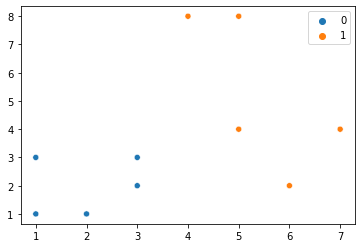

In [97]:
# Plotting the points
sns.scatterplot([x[0] for x in features], [x[1] for x in features], hue=labels)

In [98]:
# prediction, score, error
def step(x):
    if x >=0:
        return 1
    else: 
        return 0
    
# Calculate score of a point
def score(features, weights, bias):
    return weights.dot(features) + bias

# model prediction based on feature point
def prediction(features, weights, bias):
    return step(score(features, weights, bias))

# Calculate the error of a point
def error(features, label, weights, bias):
    pred = prediction(features, weights, bias)
    if pred-label == 0:
        return 0
    else:
        return np.abs(score(features, weights, bias))
    


In [99]:
# updating model parameters - separating line parameters
def percertron_update(weights, bias, feature, label, learning_rate=0.1):
    pred = prediction(feature, weights, bias)

    weights = weights + ((label-pred) * learning_rate) * feature
    bias = bias + (label-pred) * learning_rate
    
    return weights, bias

In [136]:
np.random.seed(15)
def perceptron_algorithm(features, labels):
    # initial weights and bias values
    weights = np.array([1.0 for i in range(len(features[0]))])
    bias = 1
    
    for i in range(1000):   # make 1000 iteration
        # pick random point
        n = np.random.randint(0, len(features)-1)
        # update the model parameters
        weights, bias = percertron_update(weights, bias, features[n], labels[n])
        
    return weights, bias

In [137]:
# calling the perceptrom algorithm on our sample data
weights, bias = perceptron_algorithm(features, labels)

In [138]:
# results
print("weights :", weights)
print("bias :", bias)

weights : [0.4 0.2]
bias : -2.3000000000000007


/home/m.abdelbaset/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Data points vs seperating line')

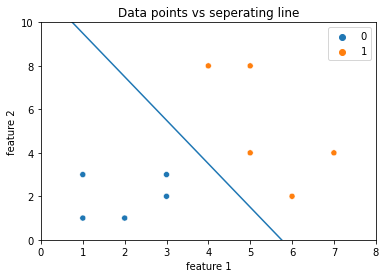

In [140]:
# Visulaization
x = np.linspace(0,8,100)
y = (weights[0] / -weights[1]) * x + (bias / -weights[1])
plt.plot(x, y)
sns.scatterplot([x[0] for x in features], [x[1] for x in features], hue=labels)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.xlim([0,8])
plt.ylim([0,10])
plt.title("Data points vs seperating line")